In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import datetime

import process 
from KRCC import *

In [2]:
path = "Processed Datasets/"
healthorg_df = pd.read_excel(path + "healthorg.xlsx", index_col=0)
leftnews_df = pd.read_excel(path + "leftnews.xlsx", index_col=0)
rightnews_df = pd.read_excel(path + "rightnews.xlsx", index_col=0)
rightind_df = pd.read_excel(path + "rightind.xlsx", index_col=0)
leftind_df = pd.read_excel(path + "leftind.xlsx", index_col=0)
celeb_df = pd.read_excel(path + "celebrities.xlsx", index_col=0)
fake_df = pd.read_excel(path + "fake.xlsx", index_col=0)
real_df = pd.read_excel(path + "real.xlsx", index_col=0)


In [3]:
# healthorg_df = healthorg_df[healthorg_df["date"] <= pd.to_datetime('2020-04-30')]
# healthorg_df = healthorg_df[healthorg_df["date"] >= pd.to_datetime('2020-03-01')]
# leftnews_df = leftnews_df[leftnews_df["date"] <= pd.to_datetime('2020-04-30')]
# leftnews_df = leftnews_df[leftnews_df["date"] >= pd.to_datetime('2020-03-01')]
# rightnews_df = rightnews_df[rightnews_df["date"] <= pd.to_datetime('2020-04-30')]
# rightnews_df = rightnews_df[rightnews_df["date"] >= pd.to_datetime('2020-03-01')]
# rightind_df = rightind_df[rightind_df["date"] <= pd.to_datetime('2020-04-30')]
# rightind_df = rightind_df[rightind_df["date"] >= pd.to_datetime('2020-03-01')]
# leftind_df = leftind_df[leftind_df["date"] <= pd.to_datetime('2020-04-30')]
# leftind_df = leftind_df[leftind_df["date"] >= pd.to_datetime('2020-03-01')]
# celeb_df = celeb_df[celeb_df["date"] <= pd.to_datetime('2020-04-30')]
# celeb_df = celeb_df[celeb_df["date"] >= pd.to_datetime('2020-03-01')]
# fake_df = fake_df[fake_df["date"] <= pd.to_datetime('2020-04-30')]
# fake_df = fake_df[fake_df["date"] >= pd.to_datetime('2020-03-01')]
# real_df = real_df[real_df["date"] <= pd.to_datetime('2020-04-30')]
# real_df = real_df[real_df["date"] >= pd.to_datetime('2020-03-01')]

In [4]:
# 1-Day Bin

healthorg_dates = healthorg_df.sort_values("date", ascending=True)["date"].value_counts()
rightind_dates = rightind_df.sort_values("date", ascending=True)["date"].value_counts()
leftind_dates = leftind_df.sort_values("date", ascending=True)["date"].value_counts()
rightnews_dates = rightnews_df.sort_values("date", ascending=True)["date"].value_counts()
leftnews_dates = leftnews_df.sort_values("date", ascending=True)["date"].value_counts()
celeb_dates = celeb_df.sort_values("date", ascending=True)["date"].value_counts()
fake_dates = fake_df.sort_values("date", ascending=True)["date"].value_counts()
real_dates = real_df.sort_values("date", ascending=True)["date"].value_counts()

In [5]:
# Bin
bins = '3D'

healthorg_df["date"] = pd.to_datetime(healthorg_df["date"])
rightind_df["date"] = pd.to_datetime(rightind_df["date"])
leftind_df["date"] = pd.to_datetime(leftind_df["date"])
rightnews_df["date"] = pd.to_datetime(rightnews_df["date"])
leftnews_df["date"] = pd.to_datetime(leftnews_df["date"])
celeb_df["date"] = pd.to_datetime(celeb_df["date"])
real_df["date"] = pd.to_datetime(real_df["date"])
fake_df["date"] = pd.to_datetime(fake_df["date"])

health_bins = pd.Series(index=healthorg_df.date, data=np.array(healthorg_df.count)).resample(bins).count().sort_index()
rightind_bins = pd.Series(index=rightind_df.date, data=np.array(rightind_df.count)).resample(bins).count().sort_index()
leftind_bins = pd.Series(index=leftind_df.date, data=np.array(leftind_df.count)).resample(bins).count().sort_index()
rightnews_bins = pd.Series(index=rightnews_df.date, data=np.array(rightnews_df.count)).resample(bins).count().sort_index()
leftnews_bins = pd.Series(index=leftnews_df.date, data=np.array(leftnews_df.count)).resample(bins).count().sort_index()
celeb_bins = pd.Series(index=celeb_df.date, data=np.array(celeb_df.count)).resample(bins).count().sort_index()
real_bins = pd.Series(index=real_df.date, data=np.array(real_df.count)).resample(bins).count().sort_index()
fake_bins = pd.Series(index=fake_df.date, data=np.array(fake_df.count)).resample(bins).count().sort_index()


Text(0.5, 1.0, 'Fake Tweets')

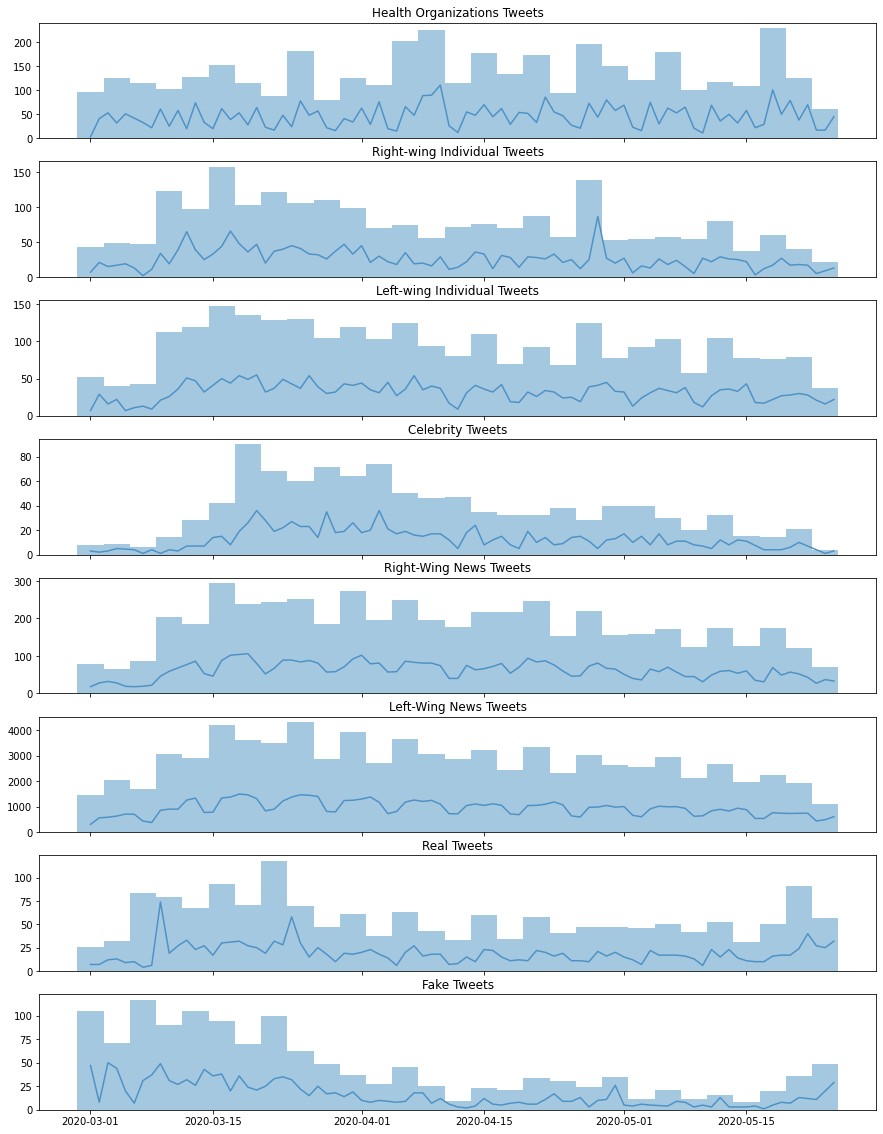

In [6]:
# plot
fig, axes = plt.subplots(8, 1, figsize=[15, 20], sharex=True)
axes[0].plot(healthorg_dates.sort_index(), color = '#4E92C5')
axes[0].bar(health_bins.index.sort_values(), health_bins, width=3, color = '#A5C8E1')
axes[0].set_title("Health Organizations Tweets")

axes[1].plot(rightind_dates.sort_index(), color = '#4E92C5')
axes[1].bar(rightind_bins.index.sort_values(), rightind_bins, width=3, color = '#A5C8E1')
axes[1].set_title("Right-wing Individual Tweets")

axes[2].plot(leftind_dates.sort_index(), color = '#4E92C5')
axes[2].bar(leftind_bins.index.sort_values(), leftind_bins, width=3, color = '#A5C8E1')
axes[2].set_title("Left-wing Individual Tweets")

axes[3].plot(celeb_dates.sort_index(), color = '#4E92C5')
axes[3].bar(celeb_bins.index.sort_values(), celeb_bins, width=3, color = '#A5C8E1')
axes[3].set_title("Celebrity Tweets")

axes[4].plot(rightnews_dates.sort_index(), color = '#4E92C5')
axes[4].bar(rightnews_bins.index.sort_values(), rightnews_bins, width=3, color = '#A5C8E1')
axes[4].set_title("Right-Wing News Tweets")

axes[5].plot(leftnews_dates.sort_index(), color = '#4E92C5')
axes[5].bar(leftnews_bins.index.sort_values(), leftnews_bins, width=3, color = '#A5C8E1')
axes[5].set_title("Left-Wing News Tweets")

axes[6].plot(real_dates.sort_index(), color = '#4E92C5')
axes[6].bar(real_bins.index.sort_values(), real_bins, width=3, color = '#A5C8E1')
axes[6].set_title("Real Tweets")

axes[7].plot(fake_dates.sort_index(), color = '#4E92C5')
axes[7].bar(fake_bins.index.sort_values(), fake_bins, width=3, color = '#A5C8E1')
axes[7].set_title("Fake Tweets")

In [7]:
print("HealthOrg Tweets: \t{}\nLeft Tweets: \t{}\nRight Tweets: \t{}\nCeleb Tweets: \t{}\nLeft News Outlet Tweets: \t{}\nRight News Outlet Tweets: \t{}\nFake Tweets:\t\t{}\nReal Tweets:\t\t{}\n".format(len(health_bins), len(leftind_bins), len(rightind_bins), len(celeb_bins), len(leftnews_bins), len(rightnews_bins), len(fake_bins), len(real_bins)))


HealthOrg Tweets: 	29
Left Tweets: 	29
Right Tweets: 	29
Celeb Tweets: 	29
Left News Outlet Tweets: 	29
Right News Outlet Tweets: 	29
Fake Tweets:		29
Real Tweets:		29



In [8]:
# only look at similar dates... so length is the same, need to find a better way

print("real and health")
krcc_test(real_bins, health_bins)
print("real and left")
krcc_test(real_bins, leftind_bins)
print("real and right")
krcc_test(real_bins, rightind_bins)
print("real and celeb")
krcc_test(real_bins, celeb_bins)
print("real and left news")
krcc_test(real_bins, leftnews_bins)
print("real and right news")
krcc_test(real_bins, rightnews_bins)


real and health
KRCC = 0.08933029983078936
p value = 0.49898902266447986
real and left
KRCC = 0.46077246190161775
p value = 0.000508709273909134
real and right
KRCC = 0.3613905670128078
p value = 0.006126587439040164
real and celeb
KRCC = 0.11970112033291594
p value = 0.36696221924437267
real and left news
KRCC = 0.3910939012878331
p value = 0.0030149446580469224
real and right news
KRCC = 0.3345748025591029
p value = 0.01124915214035778


In [9]:
print("fake and health")
krcc_test(fake_bins, health_bins)
print("fake and left")
krcc_test(fake_bins, leftind_bins)
print("fake and right")
krcc_test(fake_bins, rightind_bins)
print("fake and celeb")
krcc_test(fake_bins, celeb_bins)
print("fake and left news")
krcc_test(fake_bins, leftnews_bins)
print("fake and right news")
krcc_test(fake_bins, rightnews_bins)

fake and health
KRCC = -0.11910706644105247
p value = 0.36740981096168923
fake and left
KRCC = 0.18181832280442212
p value = 0.17021915814866728
fake and right
KRCC = 0.1782200056501518
p value = 0.17652510825538292
fake and celeb
KRCC = 0.014962640041614492
p value = 0.9102216242028961
fake and left news
KRCC = 0.1386155599501181
p value = 0.2931706563333617
fake and right news
KRCC = 0.10161160670313493
p value = 0.44144427441784584
